# Listing 2.1 Loading the MNIST-Fashion dataset in Keras

In [41]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [43]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [44]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

import matplotlib.pyplot as plt

digit = train_images[5]
print("Class Label:",train_labels[5])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 0


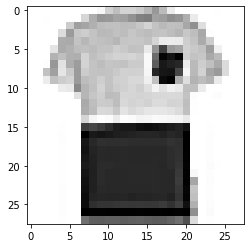

In [50]:
digit = test_images[120]
print("Class Label:",test_labels[120])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [46]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


In [47]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


# Listing 2.2 The network architecture

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()


network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

28*28

(28*28, )
(784,)

[[1,2,3],
[4,6,5],
[7,8,9]]

[1,2,3,4,6,5,7,8,9]

# Listing 2.3 The compilation step

In [32]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [33]:
train_images.ndim

3

In [34]:
50/255

0.19607843137254902

# Listing 2.4 Preparing the image data

In [35]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

# Listing 2.5 Preparing the labels

In [36]:
train_labels[0]

9

# One-Hot-Encoding

In [37]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Now Train your Model

In [39]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7446 - accuracy: 0.7411
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3902 - accuracy: 0.8575
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3465 - accuracy: 0.8717
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.3110 - accuracy: 0.8855
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.2898 - accuracy: 0.8925


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8732
test_acc: 0.873199999332428
